Developer: John Pan 

In [58]:
#import python packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2)Loading the datasets

In [4]:
# Loading the datasets
os.chdir(r'H:\Heart-Attack-Analysis-and-Prediction-main\Heart-Attack-Analysis-and-Prediction-main')
dataset = pd.read_csv('./heart.csv')

In [5]:
# Looking at first 10 raws of the data
dataset.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
#dimension of the data
dataset.shape

(303, 14)

In [7]:
#overview data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Variable Description
Age : Age of the patient; Sex : Sex of the patient; Exang : exercise induced angina (1 = yes; 0 = no); 

Caa : number of major coronary arteries involved (0-3); 

Cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
trtbps : resting systolic blood pressure (in mm Hg)

Chol : cholestoral in mg/dl fetched via BMI sensor

Fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

Rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
Thalach : maximum heart rate achieved

Output : 0= less chance of heart attack 1= more chance of heart attack

In [9]:
#Data Exploration
#Check missing values of the data
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

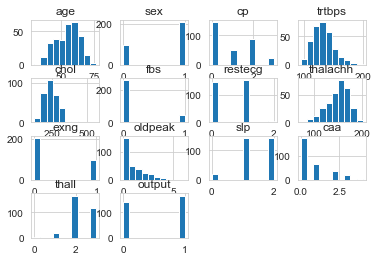

In [47]:
hist = dataset.hist()

In [10]:
dataset.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [11]:
dataset.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Text(0, 0.5, 'Count of heart attach')

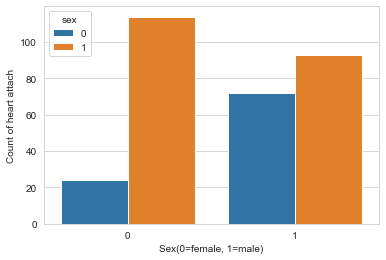

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='output',hue='sex',  data=dataset)
plt.xlabel("Sex(0=female, 1=male)")
plt.ylabel("Count of heart attach")
#sex - (1 = male, 0=female)

Text(0.5, 0, 'Age (yr)')

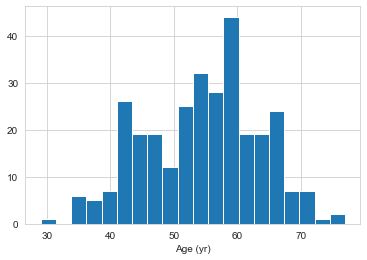

In [14]:
sns.set_style('whitegrid')
dataset['age'].hist(bins=20)
plt.xlabel('Age (yr)')

In [15]:
#Chest Pain type chest pain type Value 1: typical angina Value 2: atypical angina Value 
#3: non-anginal pain Value 4: asymptomatic
dataset.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

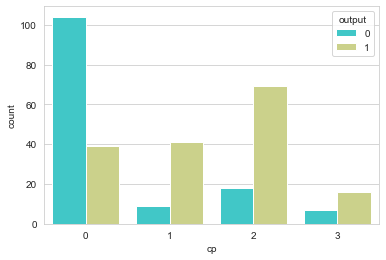

In [17]:
#Chest Pain type chest pain type Value 1: typical angina Value 2: atypical angina Value 
#3: non-anginal pain Value 4: asymptomatic
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='output', data=dataset, palette='rainbow')

Text(0.5, 0, 'Maxium heart rate per min')

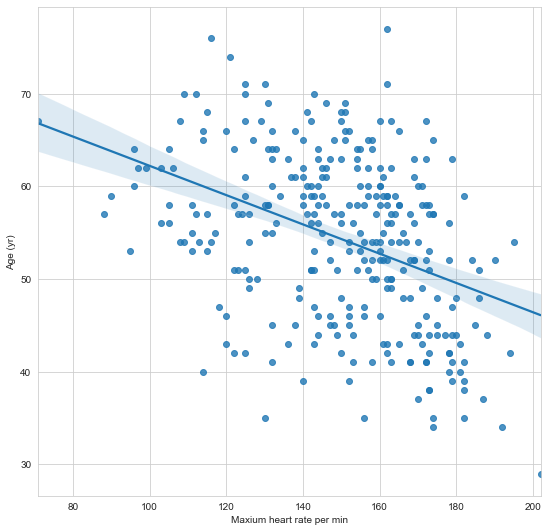

In [20]:
#Thalach : maximum heart rate achieved negative associated with patients' age
f, ax=plt.subplots(nrows=1, ncols=1, figsize=(9,9))
g = sns.regplot(y="age", x="thalachh", data=dataset, ax=ax)
plt.ylabel('Age (yr)')
plt.xlabel('Maxium heart rate per min')

Text(0.5, 0, 'resting systolic blood pressure (in mm Hg)')

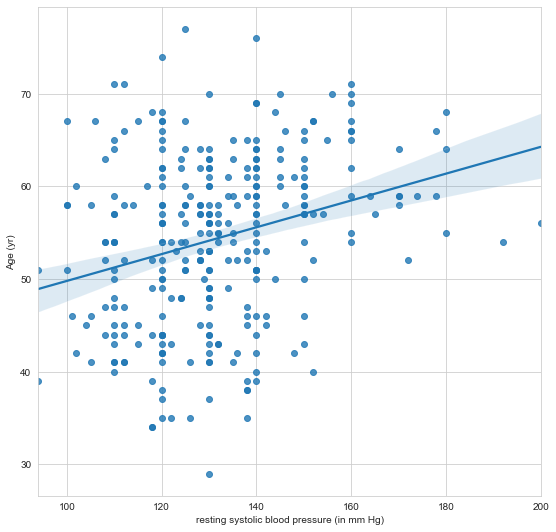

In [31]:
#trtbps : resting systolic blood pressure (in mm Hg)
f, ax=plt.subplots(nrows=1, ncols=1, figsize=(9,9))
g = sns.regplot(y="age", x="trtbps", data=dataset, ax=ax)
plt.ylabel('Age (yr)')
plt.xlabel('resting systolic blood pressure (in mm Hg)')

Text(0.5, 0, 'Total cholesterol lever mg/dL vs Age')

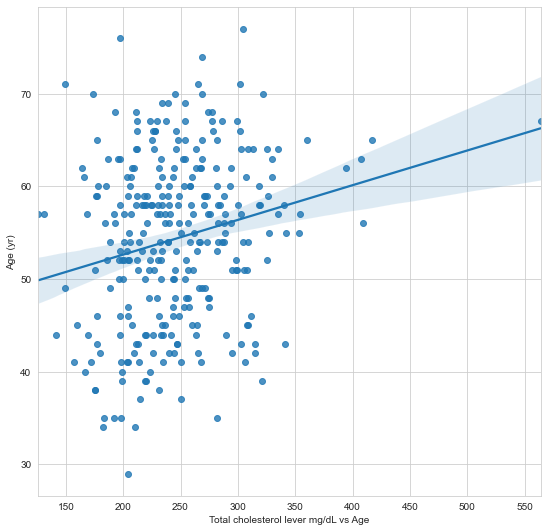

In [32]:
#Chol : cholestoral in mg/dl fetched via BMI sensor
f, ax=plt.subplots(nrows=1, ncols=1, figsize=(9,9))
g = sns.regplot(y="age", x="chol", data=dataset, ax=ax)
plt.ylabel('Age (yr)')
plt.xlabel('Total cholesterol lever mg/dL vs Age')

<AxesSubplot:title={'center':'Number of heart attacks associated with certain age'}, xlabel='Age yrs', ylabel='Frequency of heart attach'>

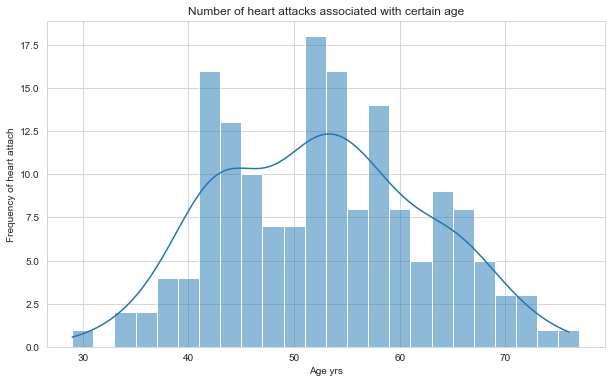

In [23]:
# We observe that people in the age of 40-60 got more heart attacks compared to others
fig = plt.figure(figsize=(10,6))
X = dataset['age']*dataset['output']
X= X[X != 0]
plt.xlabel('Age yrs')
plt.ylabel('Frequency of heart attach')
plt.title("Number of heart attacks associated with certain age")
sns.histplot(data=X,binwidth=2,kde=True)


Text(0.5, 1.0, 'Number of heart attacks associated with certain age')

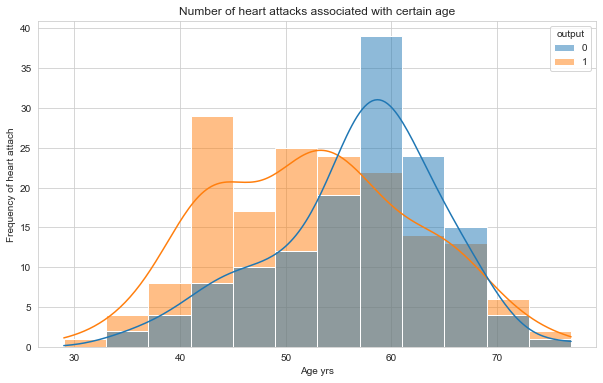

In [25]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=dataset, x="age", hue="output",kde=True)
plt.xlabel('Age yrs')
plt.ylabel('Frequency of heart attach')
plt.title("Number of heart attacks associated with certain age")

Text(0.5, 1.0, 'Number of heart attacks associated with number of arteries')

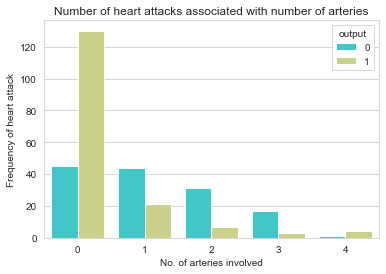

In [30]:
#Ca : number of major coronary arteries involved (0-3);
sns.set_style('whitegrid')
sns.countplot(x='caa',hue='output', data=dataset, palette='rainbow')
plt.xlabel('No. of arteries involved')
plt.ylabel('Frequency of heart attack')
plt.title("Number of heart attacks associated with number of arteries")

Text(0, 0.5, 'heart attacks')

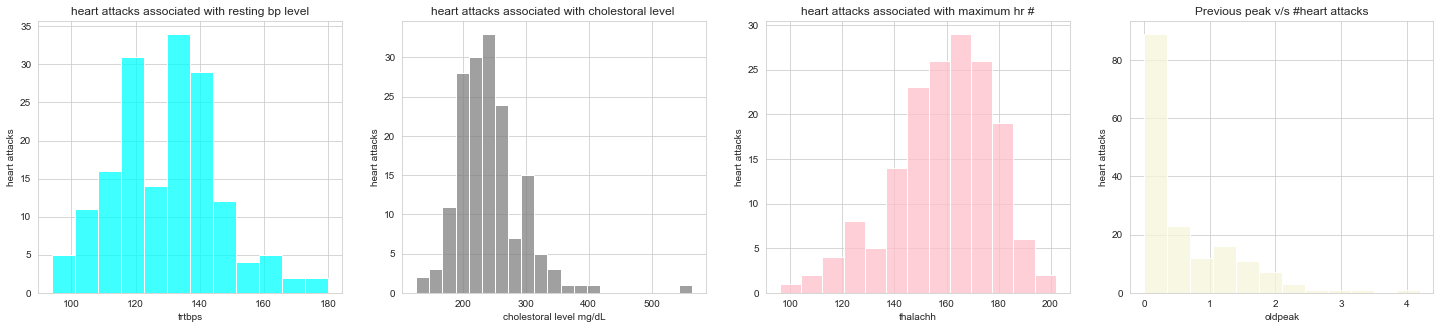

In [40]:
#numeric variables associated with heart attacks
# fig = plt.figure(figsize=(10,6))
fig, axs = plt.subplots(ncols=4,figsize=(25,5))
X = dataset['trtbps']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[0],color='cyan')
axs[0].set_title('heart attacks associated with resting bp level')
axs[0].set_xlabel('trtbps')
axs[0].set_ylabel('heart attacks')
X = dataset['chol']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[1],color='grey')
axs[1].set_title('heart attacks associated with cholestoral level ')
axs[1].set_xlabel('cholestoral level mg/dL')
axs[1].set_ylabel('heart attacks')
X = dataset['thalachh']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[2],color='pink')
axs[2].set_title('heart attacks associated with maximum hr #')
axs[2].set_xlabel('thalachh')
axs[2].set_ylabel('heart attacks')
X = dataset['oldpeak']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[3],color='Beige')
axs[3].set_title('Previous peak v/s #heart attacks')
axs[3].set_xlabel('oldpeak')
axs[3].set_ylabel('heart attacks')

Text(0.5, 1.0, 'Thal rate')

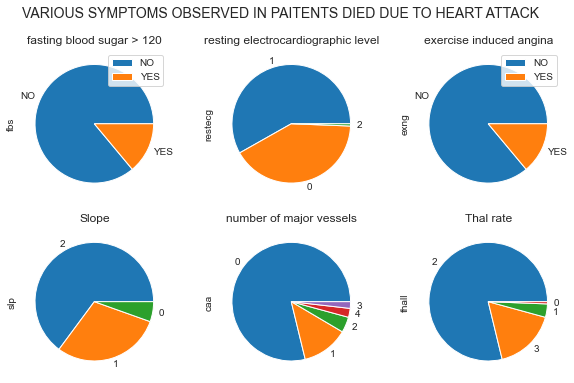

In [41]:
#Categorical variables associated with heart attacks
plt.figure(figsize=(10,6))
plt.suptitle("VARIOUS SYMPTOMS OBSERVED IN PAITENTS DIED DUE TO HEART ATTACK ", fontsize=14)
plt.subplot(2, 3, 1)
X = dataset['fbs']
X = X[dataset['output'] !=0]
# grid(True)
X.value_counts().plot.pie(labels=['NO','YES'])
plt.title("fasting blood sugar > 120")
plt.legend()
# grid(True)

plt.subplot(2, 3, 2)
X = dataset['restecg']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("resting electrocardiographic level")

plt.subplot(2, 3, 3)
X = dataset['exng']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie(labels=['NO','YES'])
plt.title("exercise induced angina")
plt.legend()

plt.subplot(2, 3, 4)
X = dataset['slp']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("Slope")


plt.subplot(2, 3, 5)
X = dataset['caa']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("number of major vessels")

plt.subplot(2, 3, 6)
X = dataset['thall']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("Thal rate")


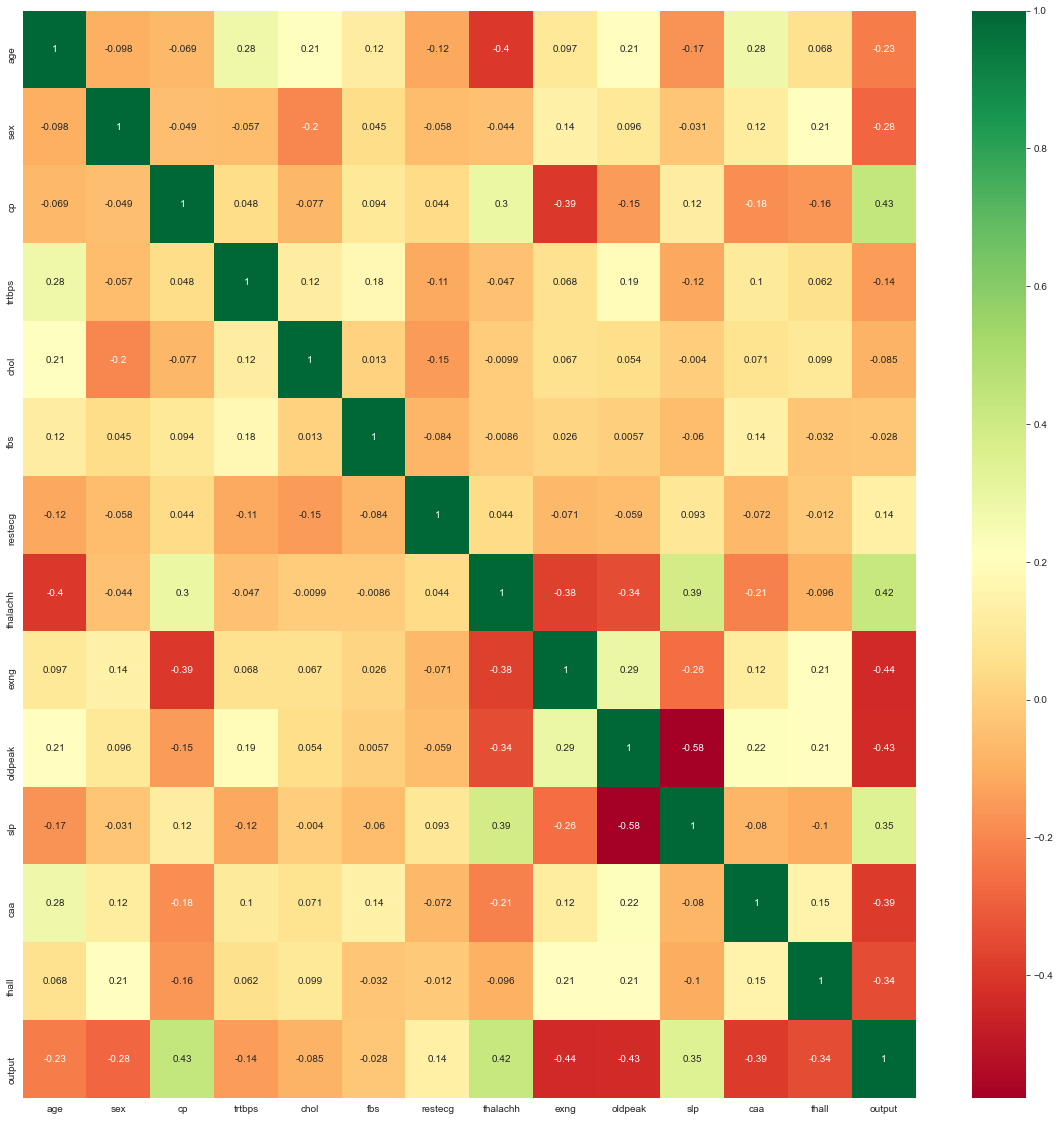

In [50]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
df = dataset.loc[:,['age','trtbps','chol','thalachh','oldpeak','output']]

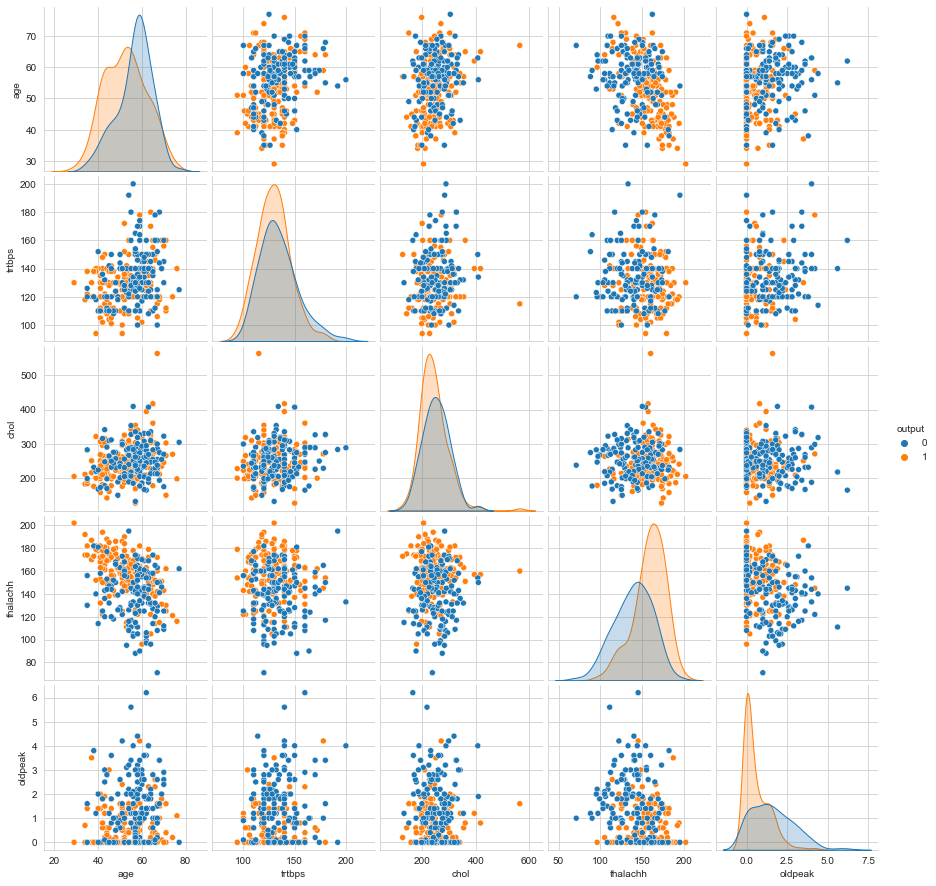

In [52]:
sns.pairplot(df,hue='output')

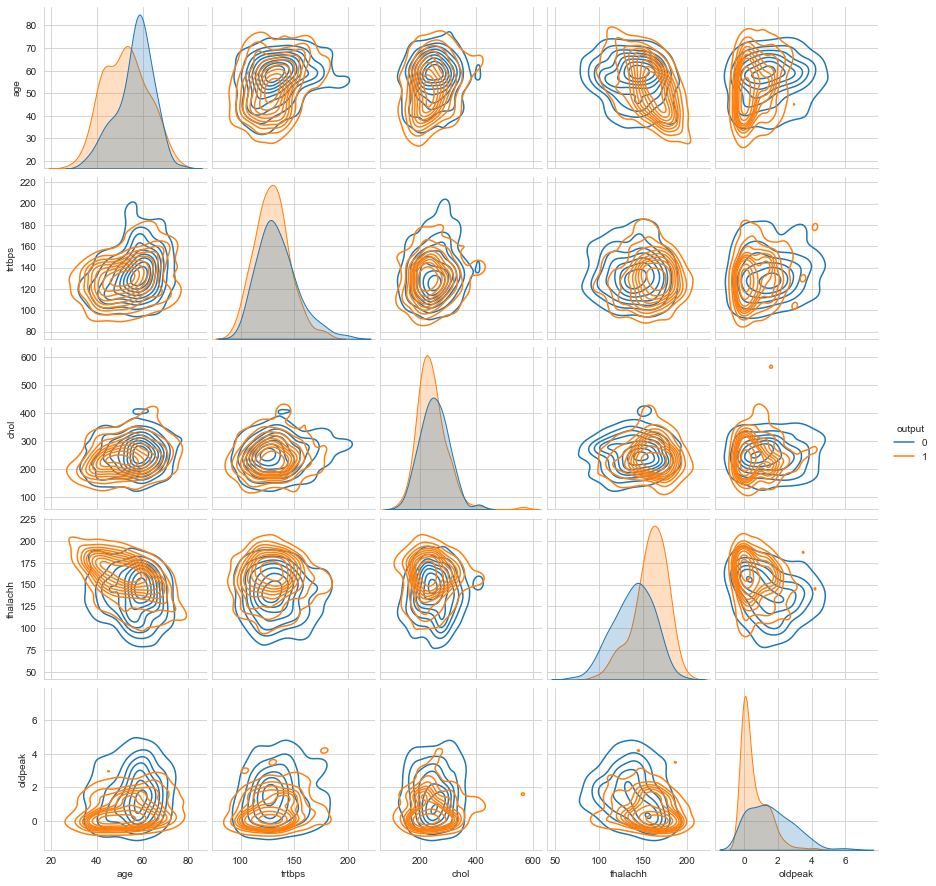

In [53]:
sns.pairplot(df,hue='output',kind='kde')

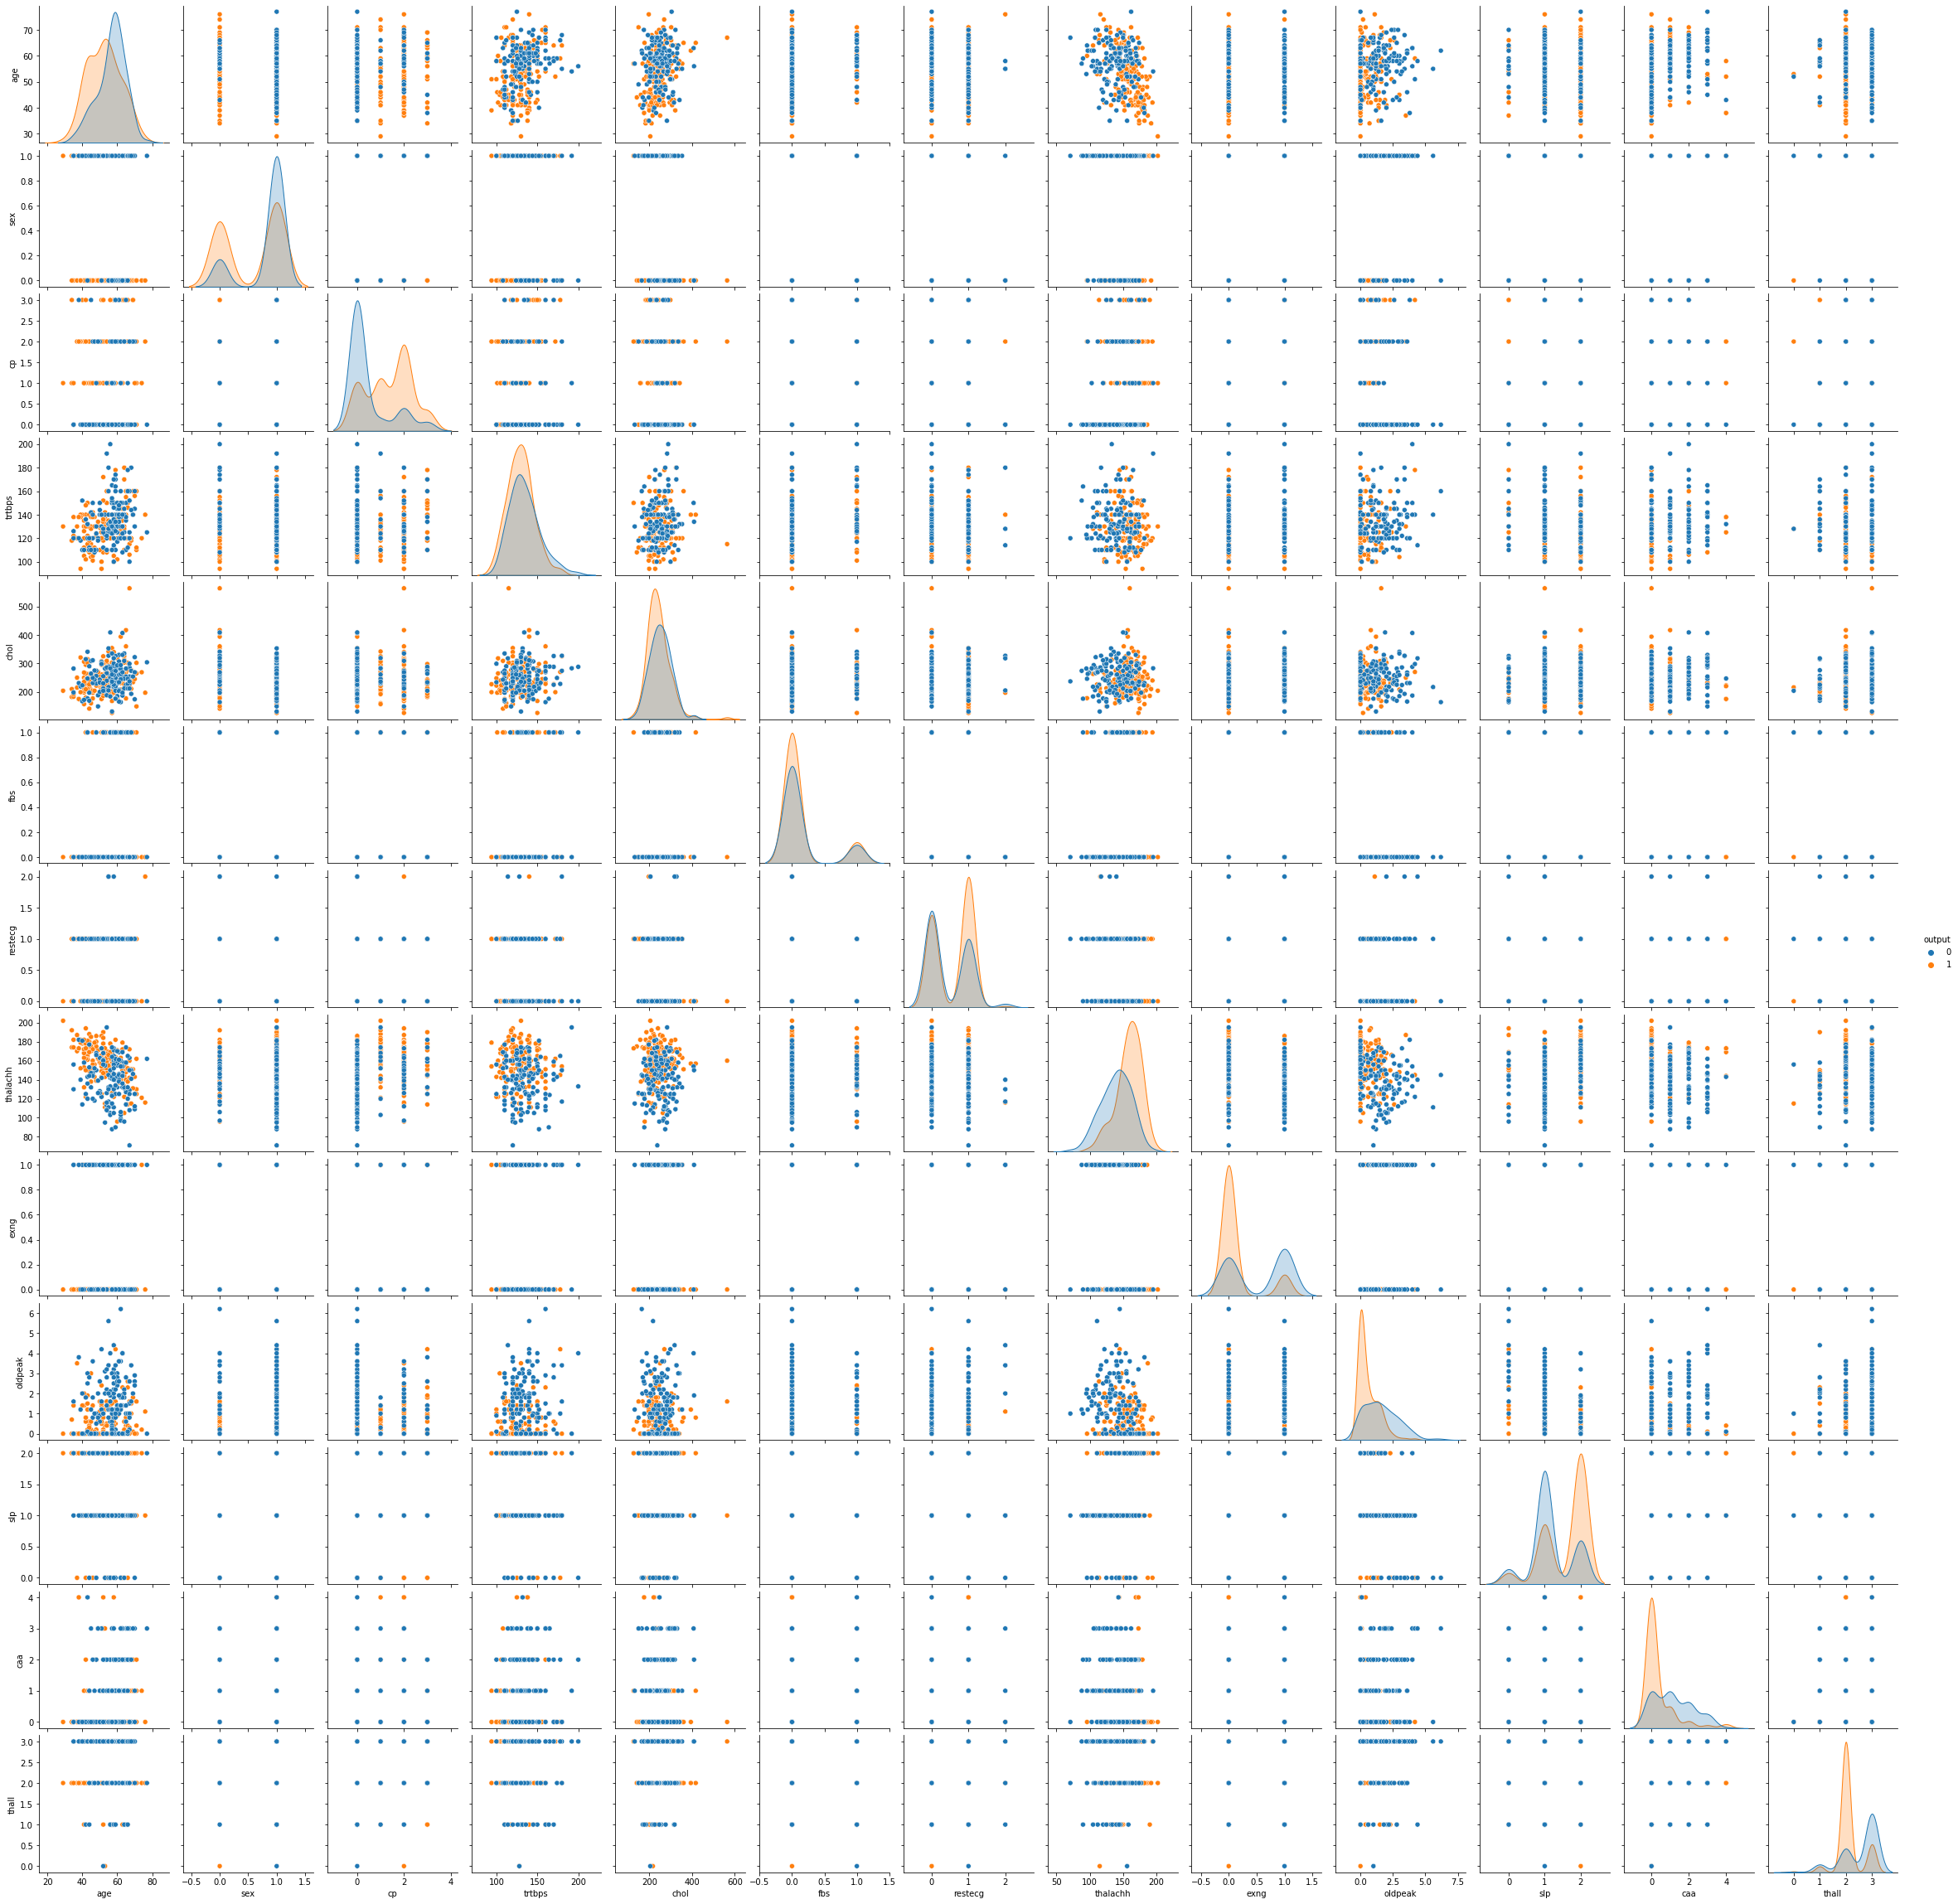

In [ ]:
sns.pairplot(dataset,hue='output')

#### Observations

1)Following symptoms are more likely to appear in paitents who suffered with heart attack

*  Chestpain type 3(Non anginal chest pains)
*  number of major vessels 0
*  Higher Thall rate
*  People with exercise induced angina
*  People with higher old peak value

2)Correlations

*   OldPeak and slp show strongly negetive Correlation 
*   Slp,thalachh,cp show strongly positive Correltion

In [54]:
# Multiple categorical columns
categorical_cols = ['cp','restecg','exng','slp','caa','thall']
df =pd.get_dummies(dataset, columns=categorical_cols)
df

,age,sex,trtbps,chol,fbs,thalachh,oldpeak,output,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,2.3,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,3.5,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,1.4,1,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0.8,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,0.6,1,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,0.2,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,1.2,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,3.4,0,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1.2,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [55]:
X = df.drop('output',axis=1)
y = df['output']

In [56]:
# Train and Test Splitting of data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [59]:
scaler = StandardScaler()
X_train[['age','trtbps','chol','thalachh','oldpeak']] = scaler.fit_transform(X_train[['age','trtbps','chol','thalachh','oldpeak']].values)
X_test[['age','trtbps','chol','thalachh','oldpeak']] = scaler.transform(X_test[['age','trtbps','chol','thalachh','oldpeak']])

##### a)Logistic Regression
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>89.62%</td>
    <td>82.42%</td>
    <td>86.32%</td>
    <td>7.81%</td>
    <td>0.83</td>
    <td>0.84%</td>
  </tr>
</table>


In [60]:
#Logistic Regression
lr_clf = LogisticRegression(random_state = 0,max_iter=1000)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,lr_clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print(lr_clf.get_params)

Train Accuracy : 89.62%
Test Accuracy  : 82.42%
<bound method BaseEstimator.get_params of LogisticRegression(max_iter=1000, random_state=0)>


**Exaustive Grid Search**

In [61]:
param = [
  {'solver': ['newton-cg', 'lbfgs', 'liblinear','saga'],
   'penalty':['l2','l1','elasticnet'],
    'C':[ 100,10, 1.0, 0.1, 0.01,0.0001],
   'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
   },
 ]
grid_clf = GridSearchCV(lr_clf, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'C': 1.0, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}

**Training the model with best params**

In [62]:
clf = LogisticRegression(C = 1.0 ,solver='saga',penalty='elasticnet',l1_ratio=0.2,max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Confusion Matrix**

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# False negetives = False positives

[[36  9]
 [ 6 40]]


0.8351648351648352

**Train/Test Accuracy**

In [64]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 89.62%
Test Accuracy  : 83.52%


**Classification Report**

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.82      0.87      0.84        46

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



**K-fold Cross Validation**

In [66]:
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.32 %
Standard Deviation: 7.81 %


##### b) K-NN
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>90.09%</td>
    <td>80.22%</td>
    <td>87.29%</td>
    <td>5.13%</td>
    <td>0.79</td>
    <td>0.82%</td>
  </tr>
</table>

**Model**

In [67]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>

**Exaustive Grid Search**

In [68]:
param = [
  {
      'n_neighbors':[1,3,5,7,9,11,13,15],
      'weights':['uniform', 'distance'],
      'metric' : ['euclidean','manhattan','minkowski'], 
      'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
      'p':[1,2],
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [69]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='manhattan' ,weights = 'uniform', p = 1,algorithm= 'auto')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Accuracy**

In [70]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 90.09%
Test Accuracy  : 80.22%


**Confusion Matrix**

In [71]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# False negetive < False positives

[[33 12]
 [ 6 40]]


0.8021978021978022

**Classification Report**

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        45
           1       0.77      0.87      0.82        46

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



**K fold Cross Validation**

In [73]:
# K-fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.29 %
Standard Deviation: 5.13 %


#### c)SVM
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>93.40%</td>
    <td>80.22%</td>
    <td>84.94%</td>
    <td>7.51%</td>
    <td>0.79</td>
    <td>0.82%</td>
  </tr>
</table>


In [74]:
#SVM
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of SVC(random_state=0)>

**Exaustive Grid Search**

In [75]:
param = [
  {
      'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
       'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
       'gamma' :[1, 0.1, 0.01, 0.001, 0.0001,'scale','auto']
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}

**Training the model with best params**

In [76]:
classifier = SVC(kernel='rbf',gamma='scale',C=1.445,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[33 12]
 [ 6 40]]


0.8021978021978022

In [78]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 93.40%
Test Accuracy  : 80.22%


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        45
           1       0.77      0.87      0.82        46

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [80]:
# K-fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.94 %
Standard Deviation: 7.51 %


#### d)Decision Tree
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>89.62%</td>
    <td>79.12%</td>
    <td>80.69%</td>
    <td>6.76%</td>
    <td>0.77</td>
    <td>0.81%</td>
  </tr>
</table>


In [82]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', random_state=0)>

**Grid Search CV**

In [83]:
param = [
  {
      'criterion':['gini', 'entropy'], 
      'splitter':['best', 'random'],
      'max_depth':[3,None],
      'max_features':[1,2,3,4,5,6,7,8,9,'auto','sqrt','log2',None],
      'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'splitter': 'random'}

**Fitting the model**

In [84]:
classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=10,max_features=5,min_samples_leaf=3,splitter='best', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [85]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 89.62%
Test Accuracy  : 79.12%


**Confusion Matrix**

In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31 14]
 [ 5 41]]


**Classification Report**

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        45
           1       0.75      0.89      0.81        46

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



**K-fold Cross Validation**

In [88]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.69 %
Standard Deviation: 6.76 %


##### e)Random Forest
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>99.09%</td>
    <td>83.52%</td>
    <td>83.97%</td>
    <td>5.88</td>
    <td>0.83</td>
    <td>0.84%</td>
  </tr>
</table>


In [89]:
#Random Forest
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,bootstrap=False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=10,
                       random_state=0)>

**Random Hyperparameter Grid**

In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

**Random Search Training**

In [91]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3,
                               verbose=2, random_state=42,
                               n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [92]:
classifier = RandomForestClassifier(bootstrap=True,max_depth=10,n_estimators = 400, criterion = 'entropy', random_state = 0,max_features='sqrt',min_samples_leaf=4,min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Train,Test Accuracy**

In [93]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 90.09%
Test Accuracy  : 83.52%


**Confusion Matrix**

In [94]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37  8]
 [ 7 39]]


**Classification Report**

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        45
           1       0.83      0.85      0.84        46

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



**K Fold Cross Validation**

In [96]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.97 %
Standard Deviation: 5.88 %


# Results And Observations

##Results
<table>
<tr>
    <th>MODEL</th>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
</tr>

<tr>
     <th scope="row">Logistic Regression</th>
    <td>89.62%</td>
    <td>82.42%</td>
    <td>86.32%</td>
    <td>7.81%</td>
    <td>0.83</td>
    <td>0.84</td>
</tr>

<tr>
    <th scope="row" > KNN </th>
    <td>90.09%</td>
    <td>80.22%</td>
    <td>87.29%</td>
    <td>5.13%</td>
    <td>0.79</td>
    <td>0.82</td>
</tr>

<tr>
    <th scope="row" > SVM </th>
    <td>93.40%</td>
    <td>80.22%</td>
    <td>84.94%</td>
    <td>7.51%</td>
    <td>0.79</td>
    <td>0.82</td>
</tr>
<tr>
    <th scope="row" > Decision Tree </th>
    <td>89.62%</td>
    <td>79.12%</td>
    <td>80.69%</td>
    <td>6.76%</td>
    <td>0.77</td>
    <td>0.81</td>
</tr>

<tr>
    <th scope="row" > Random Forest</th>
    <td>90.09%</td>
    <td>83.52%</td>
    <td>83.97%</td>
    <td>5.88</td>
    <td>0.83</td>
    <td>0.84</td>
</tr>

</table>
